# Project: Write a data science blog post

Explore listing data shared by AirBnB Seattle on Kaggle. Follow CRISP-DM process and write a blog post with findings.

## Business Understanding

If you are planing a trip to Seattle, AirBnB is a good platform to choose a nice place to stay, no matter for a short or a long period of time. AirBnB shared the listing information collected the year of 2016 in Seattle on Kaggle. We would like to explore the data to help us understand how to find a good place to stay especially with limited budgets, more specificallt, we want to answer following questions:

1. When is a good time to visit with limited budget?
2. Should I care about the square feet of the place?
3. Which region should I search for a place on AirBnB?
3. What type of room can I choose?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Understanding

AirBnB shared the listing information collected the year of 2016 in Seattle on Kaggle. The data contains 3,818 listings with 93 features about each listing. 

In [14]:
#loading data
listing = pd.read_csv('data_Seattle/listings.csv')
calendar = pd.read_csv('data_Seattle/calendar.csv')

In [3]:
listing.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [4]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Prepare Data

There are some data reprocessing needed. 

Firstly, we need to check the data type for each column, for example, we are interested in the 'price' column, we need to convert it to number. Same applied to the cleaning_fee column.
Secondly, there is a column called 'cleanning_fee', which contains some missing values. Missing value in this column means that there is no cleaning fee, so we need to replace it with 0.
Then we need to add price and cleaning_fee to create a new column - price_total.

We are interest to explore which zipcode has good places with better review and better price. By exploring zipcode column, we found one value with typo, will fix it. 

In [20]:
#Function to convert price with $ to number
def convert_price(df, colname_list):
    '''Convert price by removing dollar sign and conver to float'''
    for colname in colname_list:
        df[colname] = pd.to_numeric(df[colname].str.replace("\$|,", '', regex=True))
    return df

In [15]:
#Preprocess data 
#listing['price'] = pd.to_numeric(listing['price'].str.replace("\$|,", '', regex=True))
#listing['cleaning_fee'] = pd.to_numeric(listing['cleaning_fee'].str.replace("\$|,", '', regex=True))

#Convert price to number
listing = convert_price(listing, ['price','cleaning_fee'])

#fill in 0 to listings w/o a cleaning fee
listing['cleaning_fee'].fillna(0, inplace = True)


#Combine price and cleaning fee as total price
listing['price_total'] = listing['price'] + listing['cleaning_fee']

#Preprocess zipcode
listing.zipcode.replace('99\n98122', '98122', inplace=True)

In [17]:
calendar = pd.read_csv('data_Seattle/calendar.csv')

#Preprocessing data frame
#calendar['price'] = pd.to_numeric(calendar['price'].str.replace("\$|,", '', regex=True))
calendar = convert_price(calendar, ['price'])
calendar.head()

listing_id        date available  price
0      241032  2016-01-04         t   85.0
1      241032  2016-01-05         t   85.0
2      241032  2016-01-06         f    NaN
3      241032  2016-01-07         f    NaN
4      241032  2016-01-08         f    NaN

### Q1. When is the best time to visit Seattle with a better price?

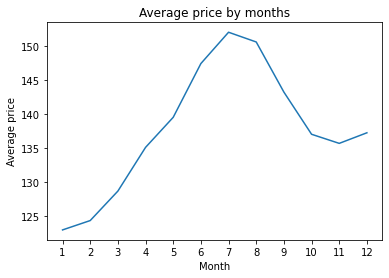

In [19]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar.groupby('month').price.agg('mean').plot()
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Average price')
plt.title('Average price by months');


The most popular season in Seattle is in the summer, when the weather is beautiful and most of the families are enjoying summer break. Below plot showed that the June, July and August have the highest average listing price. The price in winter time is generally lower except for the Christmas holiday season.

### Q2. Should I care about the square feet of the place?

In [16]:
#Get interested columns
interesting_fields = ["host_response_time", "host_response_rate", "host_neighbourhood", "zipcode", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "security_deposit", "price_total", "extra_people", "number_of_reviews", "review_scores_rating", "cancellation_policy"]
df = listing[interesting_fields]
print(df.isnull().sum())
df.head()

host_response_time       523
host_response_rate       523
host_neighbourhood       300
zipcode                    7
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
security_deposit        1952
price_total                0
extra_people               0
number_of_reviews          0
review_scores_rating     647
cancellation_policy        0
dtype: int64


host_response_time host_response_rate host_neighbourhood zipcode  \
0  within a few hours                96%         Queen Anne   98119   
1      within an hour                98%         Queen Anne   98119   
2  within a few hours                67%         Queen Anne   98119   
3                 NaN                NaN         Queen Anne   98119   
4      within an hour               100%         Queen Anne   98119   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1     Apartment  Entire home/apt             4        1.0       1.0   1.0   
2         House  Entire home/apt            11        4.5       5.0   7.0   
3     Apartment  Entire home/apt             3        1.0       0.0   2.0   
4         House  Entire home/apt             6        2.0       3.0   3.0   

  security_deposit  price_total extra_people  number_of_reviews  \
0              NaN         85.0        $5.00                207   
1          $100.00        190.0        $0.00                 43   
2        $1,000.00       1275.0       $25.00                 20   
3              NaN        100.0        $0.00                  0   
4          $700.00        575.0       $15.00                 38   

   review_scores_rating cancellation_policy  
0                  95.0            moderate  
1                  96.0              strict  
2                  97.0              strict  
3                   NaN            flexible  
4                  92.0              strict

Explore the accommodates and room size 

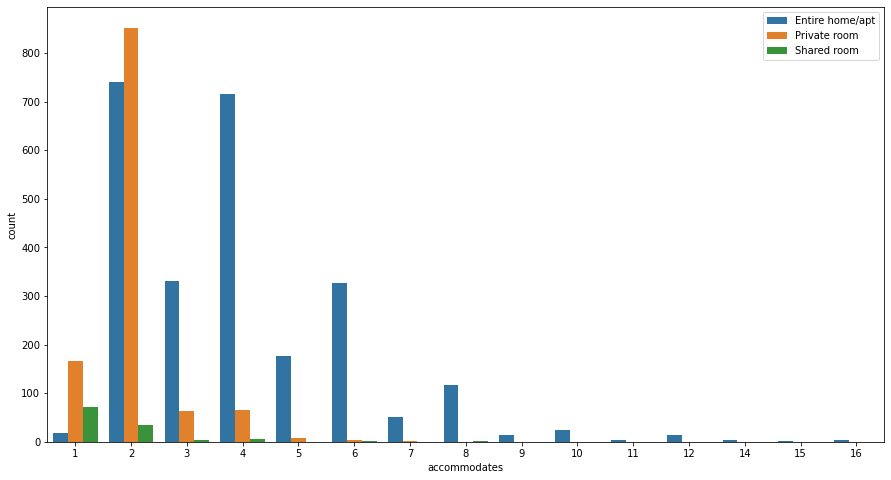

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x='accommodates',hue = 'room_type');
plt.legend(loc = 'upper right');

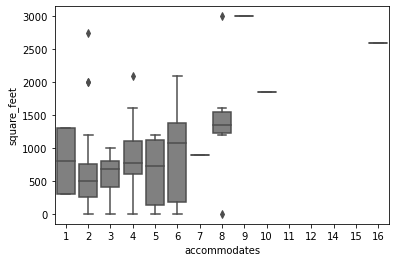

In [8]:
sns.boxplot(data=listing, x= 'accommodates', y='square_feet', color = 'grey');

First, out of the 3,818 listing, only 2.6% of them have the square feet information. The possible reason is that people do no care much about the size of the room for renting but accommodates.

By evaluating the relationship between accommodates and the room size, larger size place means more accommodates. If you do want to find a bigger place to stay, then you can choose from places with larger size but fewer accommodates.

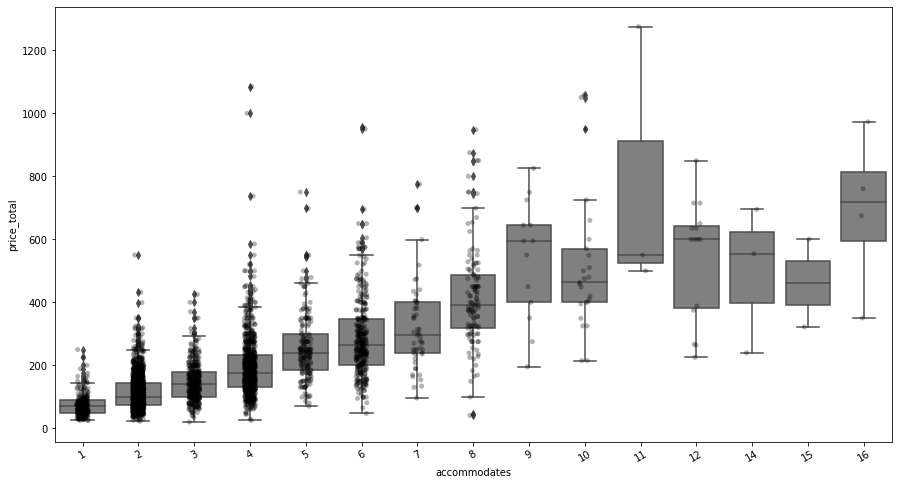

In [10]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df, x= 'accommodates', y='price_total', color='grey')
ax = sns.stripplot(data=df, x= 'accommodates', y='price_total', alpha = 0.3, color = 'black')
plt.xticks(rotation=30);

The price increase with accommodates increases. Large accommodates has fewer listing

By checking the boxplot of price per accomodates, we can see the positive correlation between accomodates and price. Most available houses can accomodate 2 to 4 people, which is also suitable for most of families. Let's take a closer look at the houses that can accomodate 2-4 people.

### Q3. Which region should I search for a place on AirBnB?


In [11]:
#Remove outliers with extreme high price outliers
familySizeHouses = df[(df['accommodates'].between(1,4)) & (df['price_total'] < 500)]

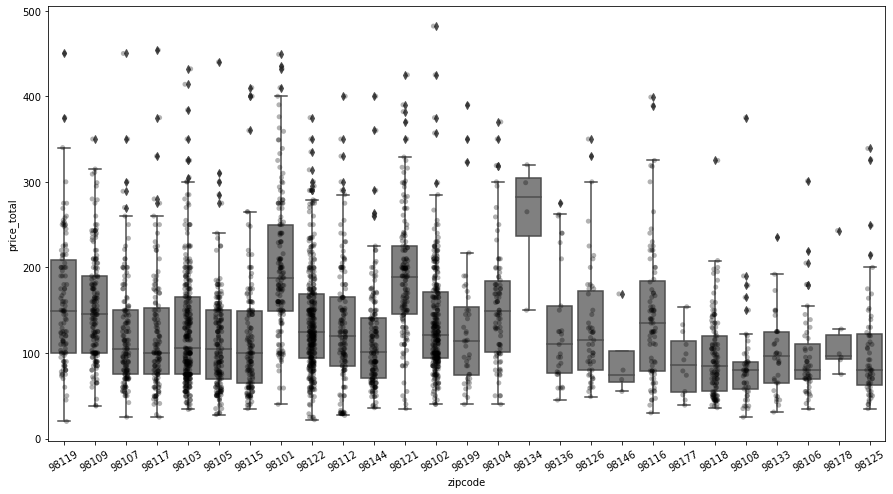

In [12]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', color='grey')
ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price_total', alpha = 0.3, color = 'black')
plt.xticks(rotation=30);


Above figure showed that some zipcode regions have more listings with cheaper price. 

Now explore the reviews in differnt zipcode. Good reviews have review score equals to 100. Good reviews are with higher prices (figure below).

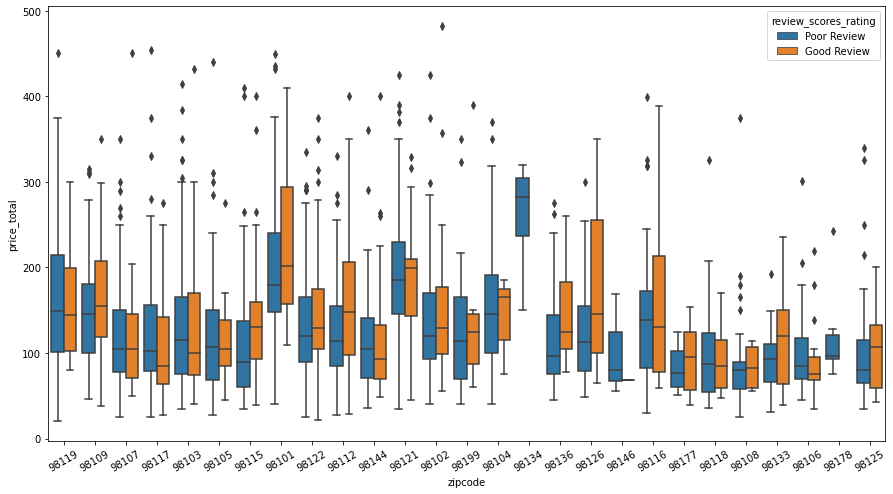

In [16]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', hue='review_scores_rating')
#ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price',hue="review_scores_rating", jitter=True, alpha = 0.5)
plt.xticks(rotation=30);

Now combine listing price and review score together.

In [13]:
##Review rate handling

#familySizeHouses['review_scores_rating'] = familySizeHouses['review_scores_rating'].mask(familySizeHouses['review_scores_rating']<90, 'Poor Review')
familySizeHouses['review_scores_rating'] = np.where(familySizeHouses['review_scores_rating'] == 100, 'Good Review', 'Poor Review')


<ipython-input-13-05c9f557535e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  familySizeHouses['review_scores_rating'] = np.where(familySizeHouses['review_scores_rating'] == 100, 'Good Review', 'Poor Review')


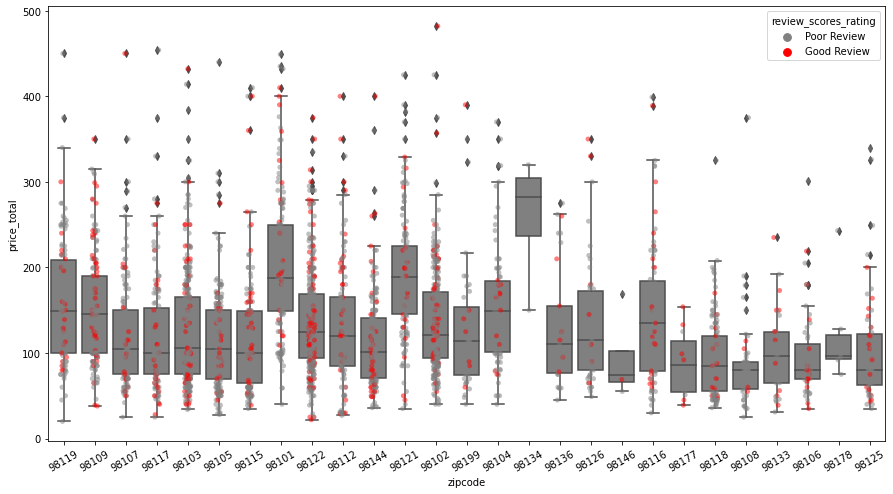

In [14]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', color = 'grey')
palette = {
    'Good Review': 'red',
    'Poor Review': 'grey'
}
ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price_total',hue="review_scores_rating", palette = palette, jitter=True, alpha = 0.5)
plt.xticks(rotation=30);

From the help of above figure, we can exclude 98134 and 98178, where there are few listing available and all listings are without a good review. 98122 seems to have more listings with good reviews with moderate price. 98144 and 98117 have some listing with good review but lower price. These regions are good candidates for a trip with limited budget.

### Q4. What type of room can I choose

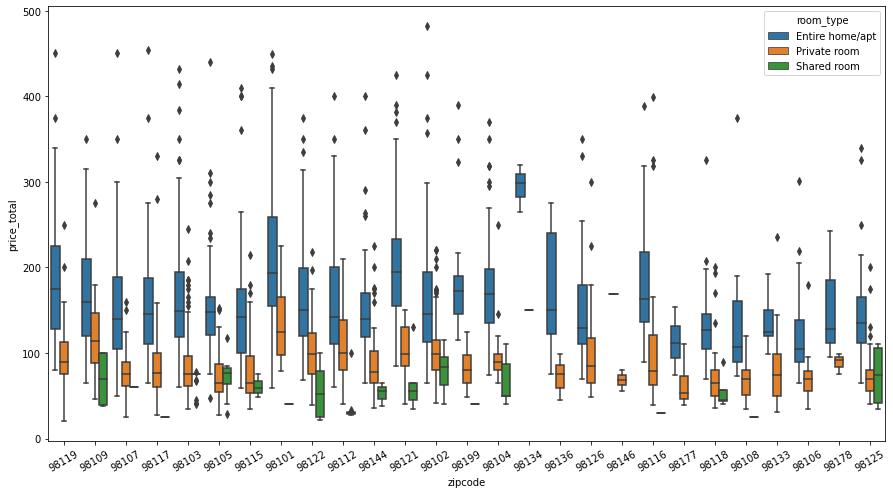

In [15]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=familySizeHouses, x= 'zipcode', y='price_total', hue='room_type')
#ax = sns.stripplot(data=familySizeHouses, x= 'zipcode', y='price',hue="review_scores_rating", jitter=True, alpha = 0.5)
plt.xticks(rotation=30);


Here we can see that only half of the listed regions provide shared rooms. Give the fact that share rooms are available only for 1 or 2 accommodates, the regions with share room options could be a good choice for a ‘solo’ trip.

### Conclusion

we took a look at the open listing data shared by AirBnB in the year of 2016. It give us some hints about the price, rooms and review scores in different zip code in Seattle. Below are some tips for budget limit trip planning:

The cheapest season to visit Seattle is in January, better to in April and May to avoid cold weather.
Accommodates is the feature you want to look at when searching a pace to stay, rather than room size.
98144 and 98117 are two regions with lower price places but good reviews.
Share room always has lower price in one region, it is a good choice for a ‘solo’ trip.